## **Practical Lab 1 - Univariate Linear Regression**

### Predicting Housing pricing in California

**Name:** Mandeep Singh Brar  
**Student ID:** 8989367  
**Course Name:** Foundations of Machine Learning Frameworks  
**Course Code:** CSCN8010  

- **GitHub Repository:** https://github.com/MandeepCon/Practical-Lab-1---ULR
- **GitHub Live Pages:** https://mandeepcon.github.io/Practical-Lab-1---ULR/

### **Goal of this report**

The goal of this report is to analyze the predictive correlations between median house value and three principal variables: median income, population, and number of households, using univariate linear regression. This investigation seeks to identify the most efficient singular predictor of median house value in California districts by fitting and assessing distinct regression models for each variable. The report will evaluate the models using statistical performance indicators and visual trends, offering insights into the significance of socioeconomic and demographic factors in affecting house prices. 

#### **Framing a Problem**
- Apply univariate linear regression to predict the model median house value in California.  
- Train three separate models using Median income, population, and number of households as individual predictors.  
- Evaluate each model with MSE, MAE, and R² metrics.  

Identify the single most effective predictor for house value estimation. 

### **Importing the necessary Python libraries**

Below, I am importing the essential libraries for data manipulation, visualization and linear regression modeling that are going to help me through out the Lab:

In [951]:
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Statistical data visualization
from sklearn.linear_model import LinearRegression  # Linear regression modeling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Model evaluation metrics

### **Getting the Data**
I have taken the dataset from kaggle. Dataset contains the information about the housing in California. 

Here is dataset link: [California Housing CSV](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### **Loading the Dataset**

In [952]:
# Load the dataset
df = pd.read_csv('Data/housing.csv')

# Show the first 5 rows to understand the structure of the dataset
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Insights:** The California housing dataset has been loaded into a Panda dataframe with the help of a CSV file. This dataset contains key variables as shown above.

### **Exploratory Data Analysis: Statistical Summary**

The `describe()` function is used below to generate descriptive statistics for each variable in the dataset, providing insights into their central tendency and spread.

In [953]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### **Checking Missing Values**

Below, I have write a code to calculate the number of missing values for each column and output will generate the columns name with missing values count and if their are no missing values in the dataset then it will print a message to showcase no missing values after running the below program:


In [954]:
# Check and display which columns have missing values

missing_values = df.isnull().sum()

# Filter and display only columns with missing values
missing_output = missing_values[missing_values > 0]

if not missing_output.empty:
    print("Columns have missing values:")
    print(missing_output)
else:
    print("columns dont have any missing values.")

Columns have missing values:
total_bedrooms    207
dtype: int64


### **Filling Missing Values**

In [955]:
# Fill missing values in 'total_bedrooms' with the mean of that column
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
print("Missing values in 'total_bedrooms' filled with mean value of the column.")

Missing values in 'total_bedrooms' filled with mean value of the column.


In [956]:
# Again checking missing values in the dataset
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

There were some missing values in the **total_bedrooms**. I filled the missing values using the **mean value** of the column. 

### **Scatter Plots:**

#### **1. Scatter plot: Median House Value vs Median Income**

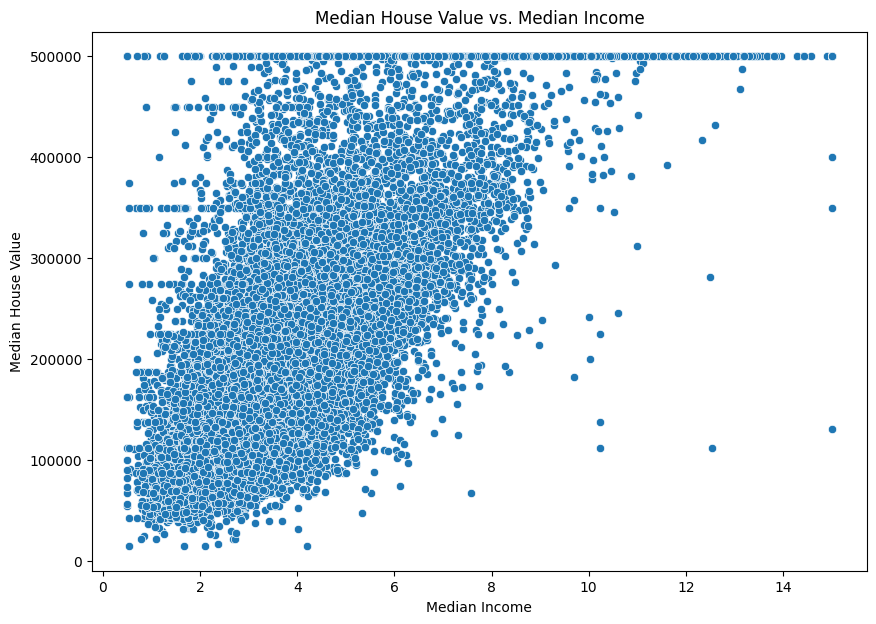

In [957]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='median_income', y='median_house_value', data=df)
plt.title('Median House Value vs. Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

**Insights:** The scatter plot illustrates a distinct positive linear correlation. Regions with elevated median income typically exhibit higher property prices, indicating that median income is likely to serve as a robust predictor in linear regression analysis.

#### **2. Scatter plot: Median House Value vs Population**

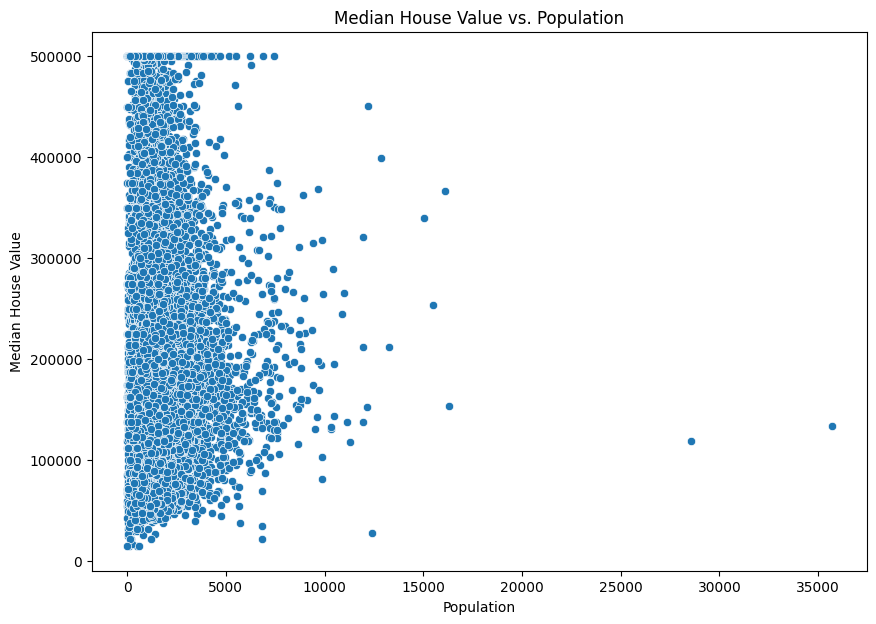

In [958]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='population', y='median_house_value', data=df)
plt.title('Median House Value vs. Population')
plt.xlabel('Population')
plt.ylabel('Median House Value')
plt.show()

**Insights:** The scatter plot illustrates a dispersed relationship, without a distinct linear trend between population and housing value. This suggests that population may serve as a tenuous predictor.

#### **3. Scatter plot: Median House Value vs Number of Households**

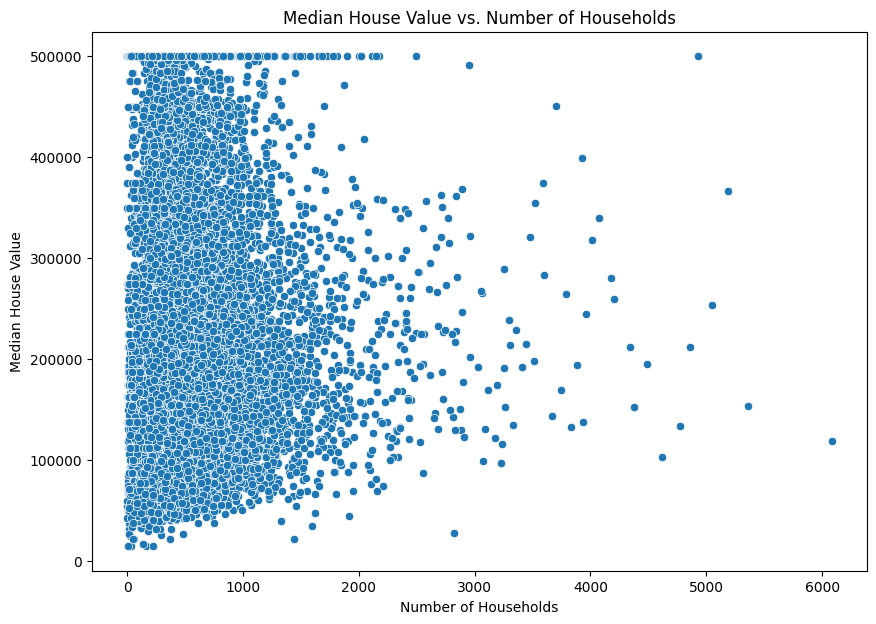

In [959]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='households', y='median_house_value', data=df)
plt.title('Median House Value vs. Number of Households')
plt.xlabel('Number of Households')
plt.ylabel('Median House Value')
plt.show()

**Insights:** A upward trend exists. However, it is less robust and more fragmented compared to median income, indicating limited predictive capacity.

**Final Insights:** The visual patterns indicate that median income is expected to yield the most robust linear regression model for forecasting house value, whilst population may have the least impact.

### **Describing the 4 variables used in this lab:**

I have used the following 4 variables:

- **median_house_value (Targeted Variable))**   
    - Median value of houses in each district in US dollars.
    - Range: 14,999  to  500,001 US dollars.
    - This is a **targeted variable** for the regression models.
    - This is a value we are trying to predict using linear regression.  


- **median_income**  
    - Median income of people living in a district in tens of thousands USD.
    - Range: Approximately 0.5 to 15.
    - It shows the strong and positive correlation with median house value.  


- **population**  
    - It shows the total number of residents per district of california. 
    - Range: About 3 to 35,000 people.
    - It doesnot provide us a clear linear relationship with the median house value.  


- **households**  
    - Show case the number of households per district. 
    - Range: About 1 to 6,000 households.
    - It doesnot showcase a positive correlation with the median house value similar to population. 

### **Fitting three linear regressions models**

1. Median house value vs. median income

In [960]:
# Target variable
med_house = df["median_house_value"]

# Predictor variable
med_income = df[["median_income"]]

# Initialize and fit the model
model = LinearRegression()
model.fit(med_income, med_house)


LinearRegression()

2. Median house value vs. population

In [961]:
# Target variable
med_house = df["median_house_value"]

# Predictor variable
pop = df[["population"]]

# Initialize and fit the model
model = LinearRegression()
model.fit(pop, med_house)

LinearRegression()

3. Median house value vs. number of households.

In [962]:
# Target variable
med_house = df["median_house_value"]

# Predictor variable
house = df[["households"]]

# Initialize and fit the model
model = LinearRegression()
model.fit(house, med_house)

LinearRegression()

### **Three linear regressions: Intercept, Slope and Errors**

In [963]:
# Prepare storage for results
results = []

for name, X in [
    ('median_income', df[['median_income']]),
    ('population', df[['population']]),
    ('households', df[['households']])
]:
    model = LinearRegression().fit(X, y)
    y_pred = model.predict(X)
    results.append([
        name,
        round(model.intercept_, 2),
        round(model.coef_[0], 2),
        round(mean_squared_error(y, y_pred), 2),
        round(mean_absolute_error(y, y_pred), 2),
        round(r2_score(y, y_pred), 2)
    ])

results_df = pd.DataFrame(results, columns=['Model', 'Intercept', 'Slope', 'MSE', 'MAE', 'R^2'])
# Display the results
display(results_df)


,Model,Intercept,Slope,MSE,MAE,R^2
0,median_income,45085.58,41793.85,7.011312e+09,62625.93,0.47
1,population,210436.26,-2.51,1.330741e+10,91153.82,0.00
2,households,196928.58,19.87,1.325778e+10,90802.74,0.00


### **Plot the resulting line on scatter plots**

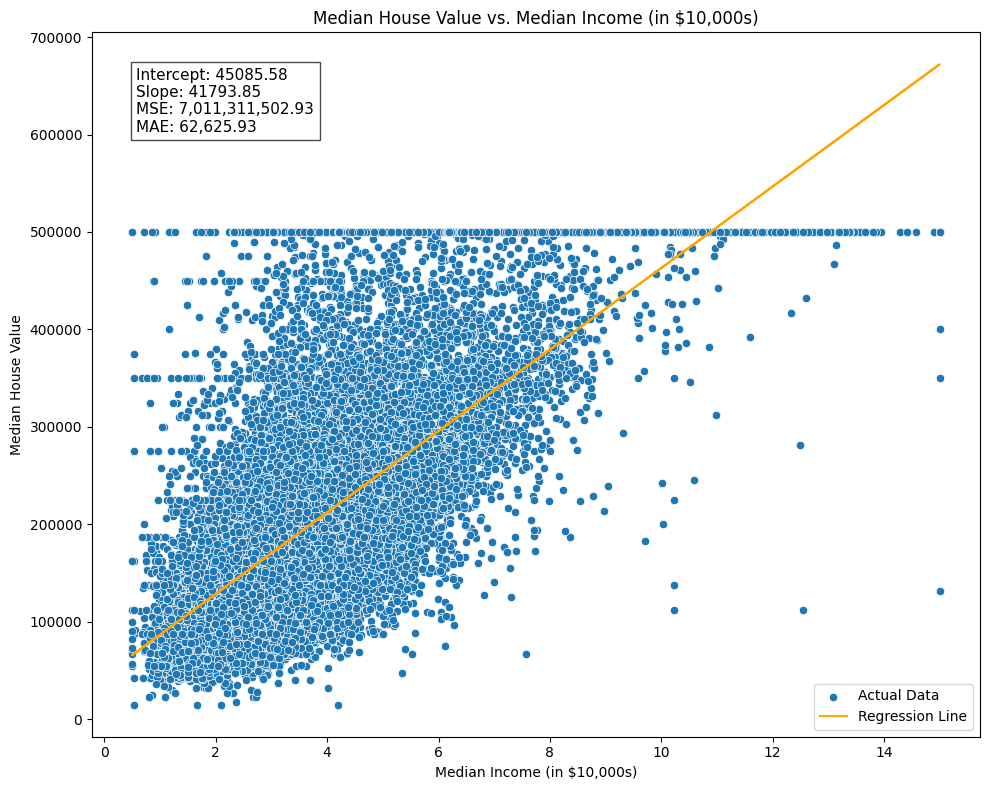

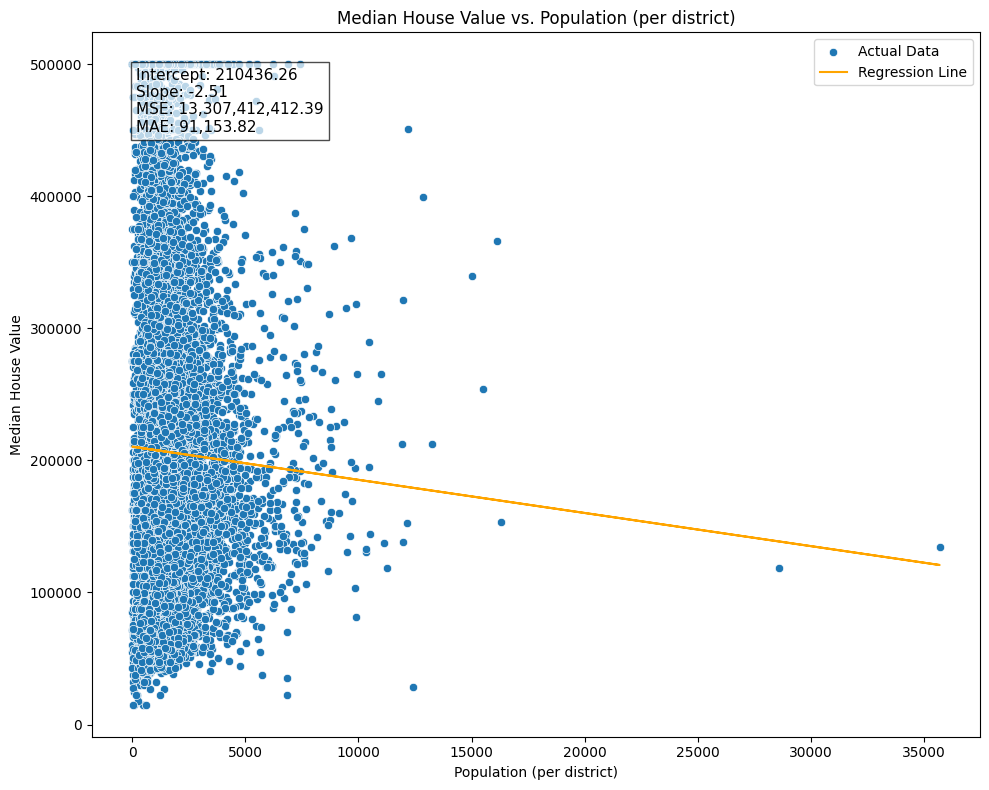

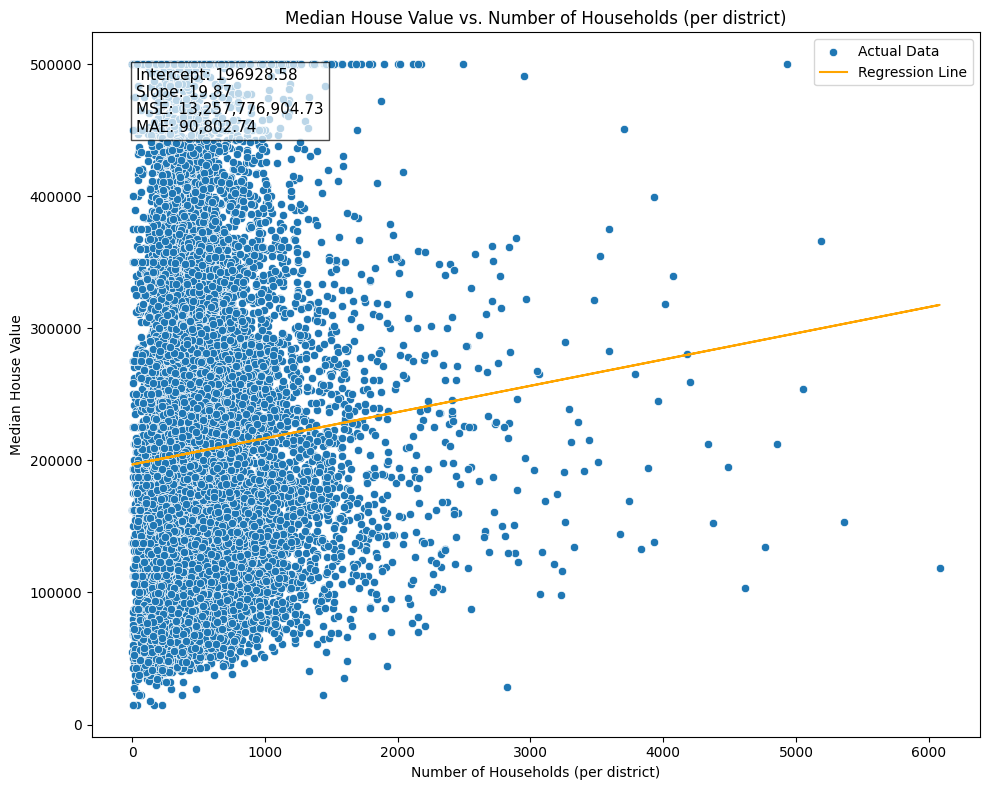

In [964]:
modeldata = [
    ('median_income', 'Median Income (in $10,000s)'),
    ('population', 'Population (per district)'),
    ('households', 'Number of Households (per district)')
]
med_house = df['median_house_value']

for executemodel, xlabel in modeldata:
    data = df[[executemodel]]
    model = LinearRegression()
    model.fit(data, med_house)
    predict = model.predict(data)
    intercept = model.intercept_
    slope = model.coef_[0]
    mse = mean_squared_error(med_house, predict)
    mae = mean_absolute_error(med_house, predict)

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=df[executemodel], y=med_house, label="Actual Data")
    plt.plot(df[executemodel], predict, color='orange', label='Regression Line')
    plt.title(f"Median House Value vs. {xlabel}")
    plt.xlabel(xlabel)
    plt.ylabel("Median House Value")
    
    # Text box for  model details
    textbox = ( f"Intercept: {intercept:.2f}\n"
        f"Slope: {slope:.2f}\n"
        f"MSE: {mse:,.2f}\n"
        f"MAE: {mae:,.2f}")
    
    plt.gca().text( 0.05, 0.95, textbox, transform=plt.gca().transAxes, fontsize=11, verticalalignment='top',
                    bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    plt.legend()
    plt.tight_layout()
    plt.show()


### **Summary of Findings**

**Conclusion:**   
Out of the three linear regression models, median income emerges as the most effective predictor of median house value, exhibiting the lowest error values and the greatest R² score (about 0.47). The regression figure illustrates a robust positive linear trend. Conversely, the models for population and number of households exhibit substantial errors and very negligible R² scores, signifying weak predictive capability and an absence of discernible trends.

**Model Comparison**
 - **Median Income Model**  
      - **Best fit:** Lowest MSE and MAE, highest R² (~0.47).
      - **Clear positive linear trend** between income and house value.
      - **Most effective single predictor** among the three.  


 - **Population Model**  
      - **Weak fit:** High MSE and MAE, R² near 0.
      - **No clear trend** in the scatter plot.
      - **Not a useful predictor** for house value in this dataset.


 - **Number of Households Model**  
      - **Moderate fit:** Errors lower than population, but much higher than income.
      - **Slight positive trend**, but weak explanatory power.
      - **Not as effective** as median income. 
       

**Additional Insights:**
 - Median income is a strong indicator of house value, confirming the importance of economic factors.
 - Population and household count alone are weak predictors due to high variability and lack of direct correlation.
 - Simple demographic counts are insufficient; predictive accuracy improves with income data.
 - Visual and statistical results consistently support income as the best univariate predictor.